<a href="https://colab.research.google.com/github/julmiha25-sys/Python/blob/main/Numpy/%D0%A1%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0_%D1%82%D0%B0%D0%BA%D1%81%D0%B8/%D0%A1%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0_%D1%82%D0%B0%D0%BA%D1%81%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Средняя скорость такси 32.24258580925573
Кол-в поездок за февраль 13333
Кол-в поездок с чаевыми более 50$ 16
Массив ковариаций - как связаны длительность по времени, по расстоянию, стоимость поездки и чаевые 
[[26.71 3413.20 68.19 6.67]
 [3413.20 10489667.24 11345.40 924.20]
 [68.19 11345.40 269.92 45.80]
 [6.67 924.20 45.80 23.35]]


<Axes: title={'center': 'Тепловая карта корреляций'}>

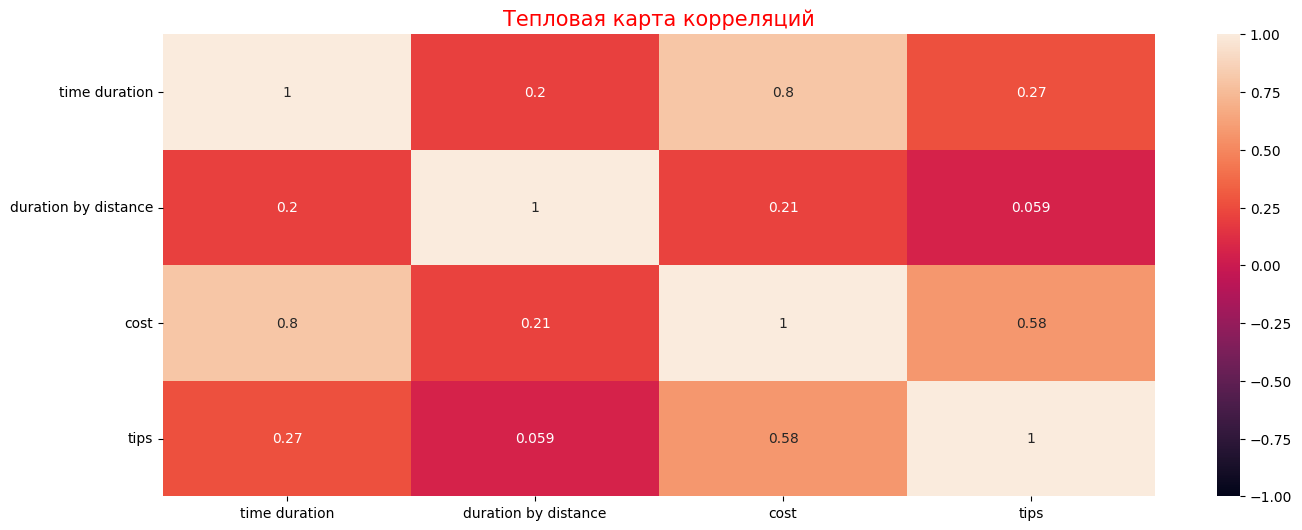

In [12]:
import numpy as np
float_formatter="{:.2f}".format
np.set_printoptions(formatter={"float_kind":float_formatter})
data=np.genfromtxt('data.csv',delimiter=',',skip_header=True)
spid_arr=data[:,7]/(data[:,8]/3600) # Массив со скоростями поездок (расстояние/время)
spid_arr.mean() # Средняя скорость такси
data[data[:,1]==2] # Выбор статистики поездок за февраль
np.shape(data[data[:,1]==2])[0] # Кол-в поездок за февраль
data[data[:,12]>50] # Выбор статистики поездок с чаевыми более 50$
np.shape(data[data[:,12]>50])[0] # Кол-в поездок с чаевыми более 50$
a=np.cov(data[:,[7,8,-2,-3]],rowvar=False) # Массив ковариаций - как связаны длительность по времени, по расстоянию, стоимость поездки и чаевые
print(f"Средняя скорость такси {spid_arr.mean()}")
print(f"Кол-в поездок за февраль {np.shape(data[data[:,1]==2])[0]}")
print(f"Кол-в поездок с чаевыми более 50$ {np.shape(data[data[:,12]>50])[0]}")
print(f"Массив ковариаций - как связаны длительность по времени, по расстоянию, стоимость поездки и чаевые \n{np.cov(data[:,[7,8,-2,-3]],rowvar=False)}")

# Визуализация
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(16,6))
plt.title('Тепловая карта корреляций',color='red',fontsize=15)
selected_columns=data[:, [7, 8, -2, -3]]
df=pd.DataFrame(selected_columns,columns=['time duration', 'duration by distance', 'cost', 'tips'])
sns.heatmap(df.corr(),vmax=1,vmin=-1,annot=True)

